In [1]:
import os
import time
import joblib
import numpy as np
import pandas as pd
from pathlib import Path
from datetime import datetime
from model_settings import ms
from feature_collector import preprocess_data
from df_collector import df_collector
pd.set_option("display.max_columns",None)
pd.options.display.float_format = '{:.5f}'.format
root = Path().resolve().parent.parent
df_collector.root = root
models_dir = os.path.join(root,ms.trained_models)
train_start = time.time()
train_start_datetime = datetime.fromtimestamp(train_start)
train_start_tag = train_start_datetime.strftime('%c')
print("\n"+"#"*18+"\n# training start #\n"+
      "#"*18+"\n"+f"\n{train_start_tag}")


##################
# training start #
##################

Wed Nov  6 18:57:07 2024


In [2]:
filetag = 'cboe spx asians'
data = df_collector.cboe_spx_barriers().iloc[:,1:]
print('data collected')
data = data[data['barrier_price']<data['spot_price']]
data['observed_price'] = data['barrier_price'].values + np.random.normal(scale=0.1,size=data.shape[0])

data collected


In [3]:
from convsklearn import convsklearn, barrier_features
trainer = convsklearn()
trainer.__dict__

{'dataset': Empty DataFrame
 Columns: []
 Index: [],
 'target_name': 'observed_price',
 'excluded_features': ['barrier_price', 'asian', 'observed_price'],
 'numerical_features': [],
 'categorical_features': [],
 'feature_set': [],
 'n_features': 0,
 'development_dates': {},
 'test_dates': {},
 'train_data': {},
 'test_data': {},
 'train_X': {},
 'train_y': {},
 'test_X': {},
 'test_y': {},
 'preprocessor': None,
 'pipeline': None,
 'model': None,
 'model_fit': None,
 'dnn_runtime': 0,
 'numerical_scaler': StandardScaler()}

In [4]:
trainer.load_data(data)
trainer.__dict__

{'dataset':           spot_price  strike_price    barrier  days_to_maturity updown outin  \
 0         4424.00000    3981.60000 2212.00000                60   Down   Out   
 1         4424.00000    3981.60000 2212.00000                60   Down   Out   
 2         4424.00000    3981.60000 2212.00000                60   Down    In   
 3         4424.00000    3981.60000 2212.00000                60   Down    In   
 4         4424.00000    3981.60000 2212.00000                90   Down   Out   
 ...              ...           ...        ...               ...    ...   ...   
 27725755  5813.50000    6394.85000 8720.25000               540     Up    In   
 27725756  5813.50000    6394.85000 8720.25000               720     Up   Out   
 27725757  5813.50000    6394.85000 8720.25000               720     Up   Out   
 27725758  5813.50000    6394.85000 8720.25000               720     Up    In   
 27725759  5813.50000    6394.85000 8720.25000               720     Up    In   
 
              w

# preprocessing

In [5]:
dates = pd.Series(np.sort(data['date'].unique()))
dates

0      2022-01-26
1      2022-01-27
2      2022-01-28
3      2022-01-31
4      2022-02-01
          ...    
679    2024-10-09
680    2024-10-10
681    2024-10-11
682    2024-10-14
683    2024-10-15
Length: 684, dtype: object

In [6]:
development_dates = dates[:1]#[:len(dates)//4]
test_dates = dates[1:2]#[~dates.isin(development_dates)]

In [7]:
trainer.__dict__

{'dataset':           spot_price  strike_price    barrier  days_to_maturity updown outin  \
 0         4424.00000    3981.60000 2212.00000                60   Down   Out   
 1         4424.00000    3981.60000 2212.00000                60   Down   Out   
 2         4424.00000    3981.60000 2212.00000                60   Down    In   
 3         4424.00000    3981.60000 2212.00000                60   Down    In   
 4         4424.00000    3981.60000 2212.00000                90   Down   Out   
 ...              ...           ...        ...               ...    ...   ...   
 27725755  5813.50000    6394.85000 8720.25000               540     Up    In   
 27725756  5813.50000    6394.85000 8720.25000               720     Up   Out   
 27725757  5813.50000    6394.85000 8720.25000               720     Up   Out   
 27725758  5813.50000    6394.85000 8720.25000               720     Up    In   
 27725759  5813.50000    6394.85000 8720.25000               720     Up    In   
 
              w

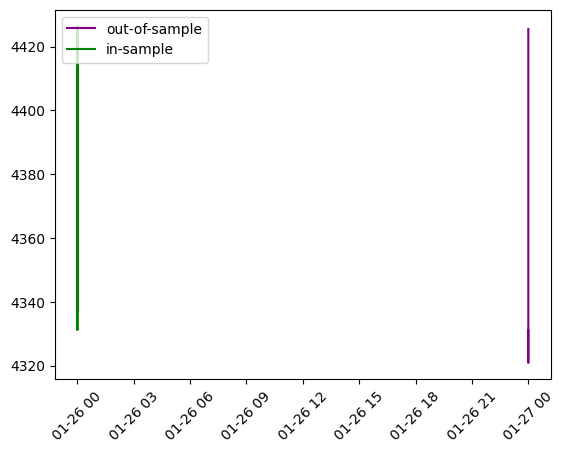

In [8]:
trainer.preprocess_data(development_dates,test_dates)

# training

In [9]:
trainer.run_dnn()
trainer.model_fit


training...

alpha: 0.01
hidden_layer_sizes: (16, 16)
learning_rate: adaptive
learning_rate_init: 0.1
solver: sgd
early_stopping: False
max_iter: 500
warm_start: True
tol: 0.0001
cpu: 49.45991802215576


TransformedTargetRegressor(regressor=Pipeline(steps=[('preprocessor',
                                                      ColumnTransformer(transformers=[('StandardScaler',
                                                                                       StandardScaler(),
                                                                                       ['spot_price',
                                                                                        'strike_price',
                                                                                        'barrier',
                                                                                        'days_to_maturity',
                                                                                        'rebate',
                                                                                        'dividend_rate',
                                                                                        'risk_free_rate',
                                                                                        'theta',
                                                                                        'kappa',
                                                                                        'rho',
                                                                                        'eta',
                                                                                        'v0']),
                                                                                      ('OneHotEncoder',
                                                                                       OneHotEncoder(sparse_output=False),
                                                                                       ['updown',
                                                                                        'outin',
                                                                                        'w',
                                                                                        'barrier_type_name'])])),
                                                     ('regressor',
                                                      MLPRegressor(alpha=0.01,
                                                                   hidden_layer_sizes=(16,
                                                                                       16),
                                                                   learning_rate='adaptive',
                                                                   learning_rate_init=0.1,
                                                                   max_iter=500,
                                                                   solver='sgd',
                                                                   warm_start=True))]),
                           transformer=StandardScaler())

In [10]:
trainer.__dict__

{'dataset':           spot_price  strike_price    barrier  days_to_maturity updown outin  \
 0         4424.00000    3981.60000 2212.00000                60   Down   Out   
 1         4424.00000    3981.60000 2212.00000                60   Down   Out   
 2         4424.00000    3981.60000 2212.00000                60   Down    In   
 3         4424.00000    3981.60000 2212.00000                60   Down    In   
 4         4424.00000    3981.60000 2212.00000                90   Down   Out   
 ...              ...           ...        ...               ...    ...   ...   
 27725755  5813.50000    6394.85000 8720.25000               540     Up    In   
 27725756  5813.50000    6394.85000 8720.25000               720     Up   Out   
 27725757  5813.50000    6394.85000 8720.25000               720     Up   Out   
 27725758  5813.50000    6394.85000 8720.25000               720     Up    In   
 27725759  5813.50000    6394.85000 8720.25000               720     Up    In   
 
              w

In [11]:
trainer.model_fit

TransformedTargetRegressor(regressor=Pipeline(steps=[('preprocessor',
                                                      ColumnTransformer(transformers=[('StandardScaler',
                                                                                       StandardScaler(),
                                                                                       ['spot_price',
                                                                                        'strike_price',
                                                                                        'barrier',
                                                                                        'days_to_maturity',
                                                                                        'rebate',
                                                                                        'dividend_rate',
                                                                                        'risk_free_rate',
                                                                                        'theta',
                                                                                        'kappa',
                                                                                        'rho',
                                                                                        'eta',
                                                                                        'v0']),
                                                                                      ('OneHotEncoder',
                                                                                       OneHotEncoder(sparse_output=False),
                                                                                       ['updown',
                                                                                        'outin',
                                                                                        'w',
                                                                                        'barrier_type_name'])])),
                                                     ('regressor',
                                                      MLPRegressor(alpha=0.01,
                                                                   hidden_layer_sizes=(16,
                                                                                       16),
                                                                   learning_rate='adaptive',
                                                                   learning_rate_init=0.1,
                                                                   max_iter=500,
                                                                   solver='sgd',
                                                                   warm_start=True))]),
                           transformer=StandardScaler())

### initial test

In [12]:
train_test = trainer.test_prediction_accuracy()


in sample:
     RMSE: 16.29005642681888
     MAE: 11.287181876041297

out of sample:
     RMSE: 56.94792422230774
     MAE: 36.35880696092227


# saving

In [13]:
train_end = time.time()
train_end_tag = str(datetime.fromtimestamp(
    train_end).strftime("%Y_%m_%d %H%M%S%f"))
file_tag = str(train_end_tag + " " + filetag)
files_dir = os.path.join(models_dir,file_tag)

def save_model():
    if Path(files_dir).exists():
        pass
    else:
        os.mkdir(files_dir)
    file_dir = os.path.join(files_dir,file_tag)
    joblib.dump(trainer.__dict__,str(f"{file_dir}.pkl"))
    pd.set_option("display.max_columns",None)
    print(f"model saved to {file_dir}")

print(f"execute the command 'save_model()' to save the following model: {file_tag}")
train_runtime = train_end-train_start
print(f"\ncpu: {train_runtime}")

execute the command 'save_model()' to save the following model: 2024_11_06 185844269798 cboe spx asians

cpu: 96.42576169967651


In [14]:
save_model()

model saved to E:\OneDrive - rsbrc\git_data\machine-learning-option-pricing\trained_models_dump\trained_models\2024_11_06 185844269798 cboe spx asians\2024_11_06 185844269798 cboe spx asians
